In [376]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

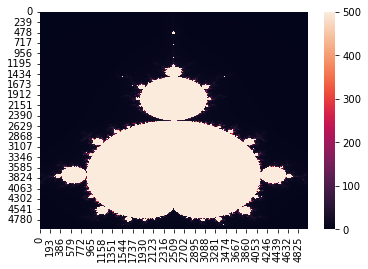

In [636]:
def mandelbrot(x, y, max_iters):
    z = complex(x,y)
    c = z
    threshold = 2
    for n in range(max_iters):
        if abs(z) > threshold:
            return n
        z = z ** 2 + c
    return max_iters

def run_mandelbrot(x, y, z, max_iter):
    for i in range(len(x)):
        for j in range(len(y)):
            z[i,j] = mandelbrot(x[i], y[j], max_iter)
    return z


size = 5000
x, y = np.linspace(-2, 0.5, size), np.linspace(-1, 1, size)
z = np.zeros([size, size]) 
max_iter = 500

res = run_mandelbrot(x, y, z, max_iter)
sns.heatmap(res)

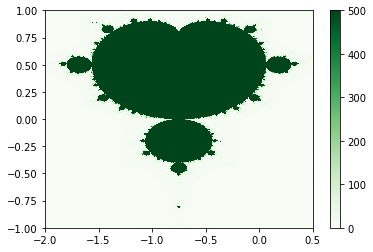

In [638]:
c = plt.pcolormesh(x, y, z, cmap ='Greens')
plt.colorbar(c)

In [625]:
# The idea is to take random numbers and evaluate the function, the proportion of values in the 
# mandelbrot set is an estimator for the density of the mandelbrot set. 
# The set is symmetri along the real axis

def monte_carlo_sample(n):
    """ The function returns n monte carlo uniformly distributed x and y coordinates.
        """
    #samplex, sampley = np.random.uniform(x_area[0], x_area[1], n), np.random.uniform(y_area[0], y_area[1], n)
    samplex, sampley = np.random.uniform(0, 1, n), np.random.uniform(0, 1, n)
    return samplex, sampley

def latin_hypercube_sample_2d(n):
    """ The function divides the number of samples into equal parts and selects a latin hypercube sample 
        for each of the combinations. The samples can then be scaled to the actual values. """
    samplex, sampley = np.zeros(n), np.zeros(n)
    random_x, random_y = np.random.permutation(n), np.random.permutation(n) # create the random combinations
    uniform = np.random.uniform(0, 1, [n, 2])
    samplex, sampley = random_x + uniform[:, 0], random_y + uniform[:, 1]
    return samplex / n, sampley / n

def ortogonal_sample_2d(n):
    """ The orthagonal sample divides the space into n equal spaces. Then by permutation it shuffles column and row orderings,
        such that they are not located on the same row/column, while being spread over all the areas. Then in a nested for-loop 
        it sorts the spaces from which a sample can be taken into a matrix that it returns. The matrix can then be multiplied by 
        the space which samples can be taken from. """
    # The first part creates the permutation combinations for each row and column
    permutation_matrix, x = np.zeros((int(np.sqrt(n)), 2, int(np.sqrt(n)))), int(np.sqrt(n))
    for i in range(len(permutation_matrix)):
        permutation_matrix[i][0], permutation_matrix[i][1] = np.random.permutation(x), np.random.permutation(x)
    count_col, count_row, insert_row = 0, 0, 0
    samplex, sampley = np.zeros(n), np.zeros(n)
    for row in range(x):
        for col in range(x):
            # find the values and set array equal
            row_index, column_index = np.where(permutation_matrix[col][1] == row)[0][0], np.where(permutation_matrix[row][0] == col)[0][0]
            samplex[insert_row], sampley[insert_row] = row_index + count_col, column_index + count_row
            # shift the array
            count_col += x
            insert_row += 1
        count_col = 0
        count_row += x
    uniform = np.random.uniform(0, 1, [n, 2])
    samplex, sampley = samplex + uniform[:, 0], sampley + uniform[:, 0]
    return samplex / n, sampley / n


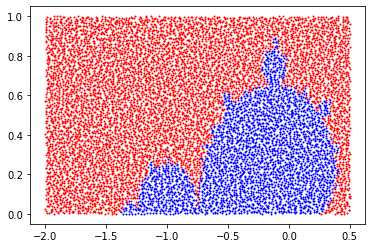

0.3076 1.5379999999999998


In [633]:
def mandelbrot_area():
    """ This function returns the area from which the samples for the mandelbrot area can be taken. """ 
    x_area, y_area = (-2, 0.5), (0, 1)
    return x_area, y_area

def sample_scaling(x_area, y_area, samplex, sampley):
    """ The function takes the uniformly distributed values from the sample functions and scales them to the mandelbrot set area. """
    sample_points = np.zeros([len(samplex),2])
    x_step, y_step = (abs(x_area[0]) + abs(x_area[1])) / len(samplex), (abs(y_area[0]) + abs(y_area[1])) / len(sampley)
    sample_points[:,0], sample_points[:,1] = x_area[0] + (samplex * (x_area[1] + abs(x_area[0]))), y_area[0] + (sampley * (y_area[1] + abs(y_area[0])))
    return sample_points

def evaluate_mandelbrot(size, max_iter, sampling_method):
    # set the area from which the samples can be taken
    x_area, y_area = mandelbrot_area()
    # Generate the samples scale them to the set area
    samplex, sampley = sampling_method(size)
    sample_points = sample_scaling(x_area, y_area, samplex, sampley)
    # evaluate the x, y coordinates
    mandel_eval = np.zeros([1,size])
    for i in range(size):
        mandel_eval[0,i] = mandelbrot(sample_points[i, 0], sample_points[i, 1], max_iter)
        if mandel_eval[0,i] > 100:
            plt.scatter(sample_points[i, 0], sample_points[i, 1], c = 'b', s = 1)
        else:
            plt.scatter(sample_points[i, 0], sample_points[i, 1], c = 'r', s = 1)
    plt.show()
    # count the samples that fall within the area.
    area_mandel = len(np.argwhere(mandel_eval > 100)) / size

    return area_mandel

#res_array = np.zeros([1,300])
#for r in range(300):
#res = evaluate_mandelbrot(2000, 200, monte_carlo_sample)
res = evaluate_mandelbrot(100**2, 200, ortogonal_sample_2d)
#res = evaluate_mandelbrot(70**2, 200, latin_hypercube_sample_2d)
    #res_array[0,r] = res * 2 * 2.7
# area should be about 1.5
#plt.hist(res_array)
#print('answer', np.mean(res))
print(res, res * 2 * 2.5) # The two because of symmetry

In [ ]:
import itertools
iterations, samples = [100, 500, 1000, 2000], [10 ** 2, 20 ** 2, 50 ** 2, 80 ** 2]

combinations = list(itertools.product(iterations, samples)) # then the loop will go through all the combinations
print(combinations)

#for comb in combinations:
    #evaluate_mandelbrot(100**2, 200, ortogonal_sample_2d)